In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

%matplotlib inline 

## PREPARANDO DATAFRAMES PARA REALIZAÇÃO DOS EDAs

In [5]:
bank = pd.read_csv('../bank_bank-full.csv', sep=';')
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [7]:
bank_yes = bank[bank['y'] == 'yes']
bank_no = bank[bank['y'] == 'no']

/home/marco/Documents/machine_learning/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


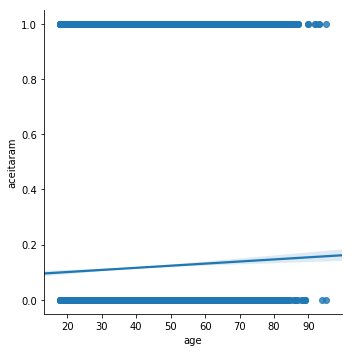

In [11]:
bank_plot = bank
bank_plot['aceitaram'] = bank_plot['y'].apply(lambda x: 1 if x == 'yes' else 0)
sns.lmplot(x='age',y='aceitaram',data=bank_plot)

# Análise das durações das chamadas

Média de duração das ligações com resultado positivo:  537.2945736434109 segundos


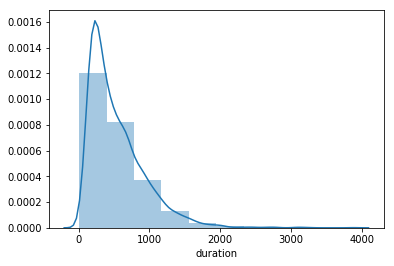

In [9]:
sns.distplot(bank_yes['duration'], bins=10)
print('Média de duração das ligações com resultado positivo: ', bank_yes['duration'].mean(), 'segundos')

Média de duração das ligações com resultado negativo:  221.18280647262162 segundos


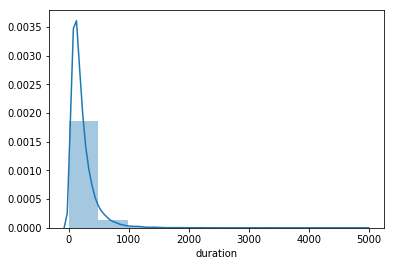

In [10]:
sns.distplot(bank_no['duration'], bins=10)
print('Média de duração das ligações com resultado negativo: ', bank_no['duration'].mean(), 'segundos')

# Análise do nível de escolaridade

In [12]:
bank_plot['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

## Verificando números absolutos

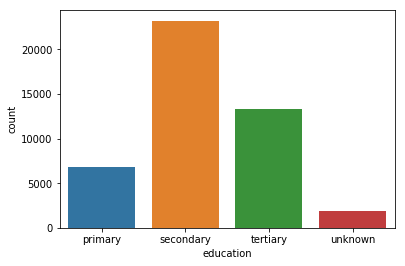

In [14]:
sns.countplot(x=bank['education'], data=bank, order =['primary', 'secondary', 'tertiary', 'unknown'])

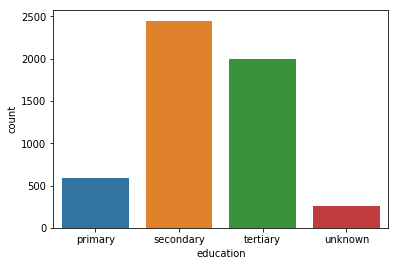

In [15]:
sns.countplot(x=bank_yes['education'], data=bank_yes, order =['primary', 'secondary', 'tertiary', 'unknown'])

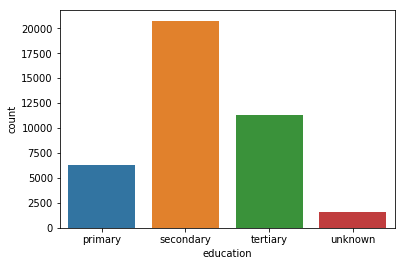

In [16]:
sns.countplot(x=bank_no['education'], data=bank_no, order =['primary', 'secondary', 'tertiary', 'unknown'])

## Verificando percentuais

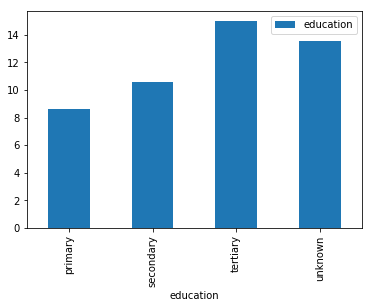

In [77]:
totoal_por_escolaridade = bank.groupby('education')['education'].count()
positivos_por_escolaridade = bank_yes.groupby('education')['education'].count()
negativos_por_escolaridade = bank_no.groupby('education')['education'].count()

porcentagem_aceitaram = pd.DataFrame(100 * positivos_por_escolaridade/totoal_por_escolaridade)
porcentagem_aceitaram.plot.bar()

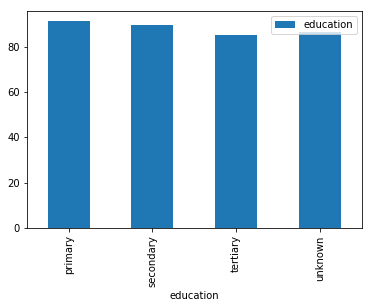

In [78]:
porcentagem_recusaram = pd.DataFrame(100 * negativos_por_escolaridade/totoal_por_escolaridade)
porcentagem_recusaram.plot.bar()

- Conclusão: É possível observar que um percentual de pessoas que aceitam é maior entre os que possuem educação de nível "tertiary"